In [ ]:
import os
import tarfile
import json
import pandas as pd
from google.colab import drive

In [ ]:
#Set WD
# Use this line in Colab
drive.mount("/content/drive")
# Use this line in local jupyter
#os.chdir("/Users/andreaprenner/Desktop/Master_UvA/1. Semester/FundamentalsOfDS/Assignment1")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Use this line in Colab
tar = tarfile.open('/content/drive/My Drive/Colab Notebooks/Assignment 1 FDS/geotagged_tweets_20160812-0912.tar')
# Use this line in local jupyter
#tar = tarfile.open("geotagged_tweets_20160812-0912.tar.gz")

files = tar.getmembers()

In [ ]:
f = tar.extractfile(files[0]) 
data = f.readlines()

In [ ]:
json.loads(data[0])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Aug 12 10:04:00 +0000 2016',
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/TY9DlZ584c',
    'expanded_url': 'http://twitter.com/DUPUY77/status/764039724818272256/photo/1',
    'id': 764039718237409281,
    'id_str': '764039718237409281',
    'indices': [27, 50],
    'media_url': 'http://pbs.twimg.com/media/CppqE1_UkAE2qFj.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CppqE1_UkAE2qFj.jpg',
    'sizes': {'large': {'h': 1136, 'resize': 'fit', 'w': 640},
     'medium': {'h': 1136, 'resize': 'fit', 'w': 640},
     'small': {'h': 680, 'resize': 'fit', 'w': 383},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/TY9DlZ584c'}],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 10774652,
    'id_str': '10774652',
    'indices': [0, 9],
    'name': 'TheBlaze',
    'screen_name': 'theblaze'},
   {'id': 25073877,
    'id_str': '2507387

In [ ]:
#Open questions: How to integrate user_mentions (entities - user_mentions) entries 
#(user_mentions is not in final data frame) and place (esp. coordinates) in data frame
#Filtering out bots
#Formatting text - removing stop words
data_formatted = []
for i in range(0, 1000): 
    data_f = json.loads(data[i])
    user = data_f['user']
    user = pd.DataFrame([user])
    user = user.drop('id_str', axis=1)
    place = data_f['place']
    place = pd.DataFrame([place])
    place = place[['full_name', 'country_code', 'bounding_box']]
    unwanted = set(['user', 'place', 'entities'])
    for unwanted_key in unwanted: del data_f[unwanted_key]
    data_pre = pd.DataFrame([data_f])
    user = user.rename({'id':'user_id'}, axis=1)
    #user['id'] = data_f['id']
    if i == 0: 
        data_formatted = data_pre
        user_formatted = user
        place_formatted = place
    else:
        data_formatted = data_formatted.append(data_pre, ignore_index=True)
        user_formatted = user_formatted.append(user, ignore_index=True)
        place_formatted = place_formatted.append(place, ignore_index=True)

In [ ]:
data_formatted = pd.concat([data_formatted, user_formatted, place_formatted], axis=1)
data_formatted.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,contributors,is_quote_status,retweet_count,favorite_count,extended_entities,favorited,retweeted,possibly_sensitive,filter_level,lang,timestamp_ms,quoted_status_id,quoted_status_id_str,quoted_status,user_id,name,screen_name,location,url,description,protected,verified,followers_count,friends_count,listed_count,favourites_count,statuses_count,created_at,utc_offset,time_zone,geo_enabled,lang,contributors_enabled,is_translator,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,profile_image_url,profile_image_url_https,default_profile,default_profile_image,following,follow_request_sent,notifications,profile_banner_url,full_name,country_code,bounding_box
0,Fri Aug 12 10:04:00 +0000 2016,764039724818272256,764039724818272256,@theblaze @realDonaldTrump https://t.co/TY9DlZ...,"<a href=""http://twitter.com/download/iphone"" r...",False,764038820476051456,764038820476051456,10774652,10774652,theblaze,None,None,None,False,0,0,"{'media': [{'id': 764039718237409281, 'id_str'...",False,False,False,low,und,1470996240225,NaN,NaN,NaN,366636488,GIL DUPUY,DUPUY77,Miami,http://ggm-dupuy.com,"Fashion photographer, love action and adventur...",False,False,186,446,19,1708,17620,Fri Sep 02 14:54:17 +0000 2011,None,None,True,en,False,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,009999,EEEEEE,EFEFEF,333333,True,http://pbs.twimg.com/profile_images/7609156129...,https://pbs.twimg.com/profile_images/760915612...,False,False,None,None,None,NaN,"Frontenac, MO",US,"{'type': 'Polygon', 'coordinates': [[[-90.4339..."
1,Fri Aug 12 10:04:02 +0000 2016,764039733076897792,764039733076897792,@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN CO...,"<a href=""http://twitter.com/download/android"" ...",False,None,None,813286,813286,BarackObama,None,None,None,False,0,0,NaN,False,False,False,low,en,1470996242194,NaN,NaN,NaN,82496193,Red Octopus,redoctapus,"Ogletown, DE",None,"AWSCWI Pipefitter USAF NRA I remember USA, Hun...",False,False,531,677,26,3850,5046,Thu Oct 15 00:28:04 +0000 2009,-14400,Eastern Time (US & Canada),True,en,False,False,000000,http://abs.twimg.com/images/themes/theme9/bg.gif,https://abs.twimg.com/images/themes/theme9/bg.gif,False,3B94D9,000000,000000,000000,False,http://pbs.twimg.com/profile_images/6883746403...,https://pbs.twimg.com/profile_images/688374640...,False,False,None,None,None,https://pbs.twimg.com/profile_banners/82496193...,"Baton Rouge, LA",US,"{'type': 'Polygon', 'coordinates': [[[-91.2189..."
2,Fri Aug 12 10:04:10 +0000 2016,764039769244348417,764039769244348417,@theblaze @realDonaldTrump https://t.co/n050DB...,"<a href=""http://twitter.com/download/iphone"" r...",False,764038820476051456,764038820476051456,10774652,10774652,theblaze,None,None,None,False,0,0,"{'media': [{'id': 764039762973896704, 'id_str'...",False,False,False,low,und,1470996250817,NaN,NaN,NaN,366636488,GIL DUPUY,DUPUY77,Miami,http://ggm-dupuy.com,"Fashion photographer, love action and adventur...",False,False,186,446,19,1708,17621,Fri Sep 02 14:54:17 +0000 2011,None,None,True,en,False,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,009999,EEEEEE,EFEFEF,333333,True,http://pbs.twimg.com/profile_images/7609156129...,https://pbs.twimg.com/profile_images/760915612...,False,False,None,None,None,NaN,"Frontenac, MO",US,"{'type': 'Polygon', 'coordinates': [[[-90.4339..."
3,Fri Aug 12 10:04:21 +0000 2016,764039812479225856,764039812479225856,@HillaryClinton he will do in one year all the...,"<a href=""http://twitter.com/download/iphone"" r...",False,762623255005966336,762623255005966336,1

In [ ]:
pd.set_option('display.max_rows', 10)
#pd.set_option('display.max_columns', 500)
data_formatted.dtypes

created_at            object
id                     int64
id_str                object
text                  object
source                object
                       ...  
notifications         object
profile_banner_url    object
full_name             object
country_code          object
bounding_box          object
Length: 67, dtype: object

# Filters, Cleanings, Fixes

In [ ]:
data_formatted2 = data_formatted.copy()

#Filtering 
#Only US Tweets
#data_formatted2 = data_formatted2[data_formatted2.country_code == 'US']
#Only Verified User
#data_formatted2 = data_formatted2[data_formatted2.verified == True]
#Only English languague
#data_formatted2 = data_formatted2[data_formatted2.lang == 'en']
#Only tweets that we have the state location

#Fixes
#Create State
data_formatted2['state'] = data_formatted2['full_name'].str[-2:]
data_formatted2

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,contributors,is_quote_status,retweet_count,favorite_count,extended_entities,favorited,retweeted,possibly_sensitive,filter_level,lang,timestamp_ms,quoted_status_id,quoted_status_id_str,quoted_status,user_id,name,screen_name,location,url,description,protected,verified,followers_count,friends_count,listed_count,favourites_count,statuses_count,created_at,utc_offset,time_zone,geo_enabled,lang,contributors_enabled,is_translator,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,profile_image_url,profile_image_url_https,default_profile,default_profile_image,following,follow_request_sent,notifications,profile_banner_url,full_name,country_code,bounding_box,state
0,Fri Aug 12 10:04:00 +0000 2016,764039724818272256,764039724818272256,@theblaze @realDonaldTrump https://t.co/TY9DlZ...,"<a href=""http://twitter.com/download/iphone"" r...",False,764038820476051456,764038820476051456,10774652,10774652,theblaze,None,None,None,False,0,0,"{'media': [{'id': 764039718237409281, 'id_str'...",False,False,False,low,und,1470996240225,NaN,NaN,NaN,366636488,GIL DUPUY,DUPUY77,Miami,http://ggm-dupuy.com,"Fashion photographer, love action and adventur...",False,False,186,446,19,1708,17620,Fri Sep 02 14:54:17 +0000 2011,None,None,True,en,False,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,009999,EEEEEE,EFEFEF,333333,True,http://pbs.twimg.com/profile_images/7609156129...,https://pbs.twimg.com/profile_images/760915612...,False,False,None,None,None,NaN,"Frontenac, MO",US,"{'type': 'Polygon', 'coordinates': [[[-90.4339...",MO
1,Fri Aug 12 10:04:02 +0000 2016,764039733076897792,764039733076897792,@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN CO...,"<a href=""http://twitter.com/download/android"" ...",False,None,None,813286,813286,BarackObama,None,None,None,False,0,0,NaN,False,False,False,low,en,1470996242194,NaN,NaN,NaN,82496193,Red Octopus,redoctapus,"Ogletown, DE",None,"AWSCWI Pipefitter USAF NRA I remember USA, Hun...",False,False,531,677,26,3850,5046,Thu Oct 15 00:28:04 +0000 2009,-14400,Eastern Time (US & Canada),True,en,False,False,000000,http://abs.twimg.com/images/themes/theme9/bg.gif,https://abs.twimg.com/images/themes/theme9/bg.gif,False,3B94D9,000000,000000,000000,False,http://pbs.twimg.com/profile_images/6883746403...,https://pbs.twimg.com/profile_images/688374640...,False,False,None,None,None,https://pbs.twimg.com/profile_banners/82496193...,"Baton Rouge, LA",US,"{'type': 'Polygon', 'coordinates': [[[-91.2189...",LA
2,Fri Aug 12 10:04:10 +0000 2016,764039769244348417,764039769244348417,@theblaze @realDonaldTrump https://t.co/n050DB...,"<a href=""http://twitter.com/download/iphone"" r...",False,764038820476051456,764038820476051456,10774652,10774652,theblaze,None,None,None,False,0,0,"{'media': [{'id': 764039762973896704, 'id_str'...",False,False,False,low,und,1470996250817,NaN,NaN,NaN,366636488,GIL DUPUY,DUPUY77,Miami,http://ggm-dupuy.com,"Fashion photographer, love action and adventur...",False,False,186,446,19,1708,17621,Fri Sep 02 14:54:17 +0000 2011,None,None,True,en,False,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,009999,EEEEEE,EFEFEF,333333,True,http://pbs.twimg.com/profile_images/7609156129...,https://pbs.twimg.com/profile_images/760915612...,False,False,None,None,None,NaN,"Frontenac, MO",US,"{'type': 'Polygon', 'coordinates': [[[-90.4339...",MO
3,Fri Aug 12 10:04:21 +0000 2016,764039812479225856,764039812479225856,@HillaryClinton he will do in one year all the...,"<a href=""http://twitter.com/download/iphone"" r...",False,762623255005966336,76262

# Column selection

In [ ]:
#Column Selection
selected_columns = ['created_at'
                  ,'id'
                  ,'text'
                  ,'in_reply_to_user_id'
                  ,'in_reply_to_user_id_str'
                  ,'user'
                  ,'id'
                  ,'location'
                  ,'description'
                  ,'verified'
                  ,'followers_count'
                  ,'friends_count'
                  ,'statuses_count'
                  ,'created_at'
                  ,'lang'
                  ,'place'
                  ,'id'
                  ,'name'
                  ,'full_name'
                  ,'country_code'
                  ,'country'
                  ,'coordinates'
                  ,'entities'
                  ,'hashtags'
                  ,'user_mentions'
                  ,'screen_name'
                  ,'id'
                  ,'screen_name'
                  ,'id']

columns = [col for col in data_formatted2.columns 
  if col in selected_columns]

data_formatted3 = data_formatted2[columns].copy()
data_formatted3

,created_at,created_at,id,text,in_reply_to_user_id,in_reply_to_user_id_str,coordinates,lang,lang,name,screen_name,location,description,verified,followers_count,friends_count,statuses_count,created_at,created_at,lang,lang,full_name,country_code
0,Fri Aug 12 10:04:00 +0000 2016,Fri Sep 02 14:54:17 +0000 2011,764039724818272256,@theblaze @realDonaldTrump https://t.co/TY9DlZ...,10774652,10774652,None,und,en,GIL DUPUY,DUPUY77,Miami,"Fashion photographer, love action and adventur...",False,186,446,17620,Fri Aug 12 10:04:00 +0000 2016,Fri Sep 02 14:54:17 +0000 2011,und,en,"Frontenac, MO",US
1,Fri Aug 12 10:04:02 +0000 2016,Thu Oct 15 00:28:04 +0000 2009,764039733076897792,@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN CO...,813286,813286,None,en,en,Red Octopus,redoctapus,"Ogletown, DE","AWSCWI Pipefitter USAF NRA I remember USA, Hun...",False,531,677,5046,Fri Aug 12 10:04:02 +0000 2016,Thu Oct 15 00:28:04 +0000 2009,en,en,"Baton Rouge, LA",US
2,Fri Aug 12 10:04:10 +0000 2016,Fri Sep 02 14:54:17 +0000 2011,764039769244348417,@theblaze @realDonaldTrump https://t.co/n050DB...,10774652,10774652,None,und,en,GIL DUPUY,DUPUY77,Miami,"Fashion photographer, love action and adventur...",False,186,446,17621,Fri Aug 12 10:04:10 +0000 2016,Fri Sep 02 14:54:17 +0000 2011,und,en,"Frontenac, MO",US
3,Fri Aug 12 10:04:21 +0000 2016,Tue Jun 02 01:59:59 +0000 2009,764039812479225856,@HillaryClinton he will do in one year all the...,1339835893,1339835893,None,en,en,JanJorgenson,jjorgi30,Australia,The best movies are written and directed by pe...,False,180,298,2231,Fri Aug 12 10:04:21 +0000 2016,Tue Jun 02 01:59:59 +0000 2009,en,en,"Melbourne, Victoria",AU
4,Fri Aug 12 10:04:30 +0000 2016,Mon Aug 20 09:43:48 +0000 2012,764039849850482689,#CNN #newday clear #Trump deliberately throwin...,None,None,None,en,en,Beverly Spence,bspence5,None,"Retired, political wonk mother of one grandmot...",False,2652,2976,92605,Fri Aug 12 10:04:30 +0000 2016,Mon Aug 20 09:43:48 +0000 2012,en,en,"Baltimore, MD",US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Fri Aug 12 11:35:53 +0000 2016,Wed Dec 09 00:49:42 +0000 2009,764062848695664640,@realDonaldTrump @exxonmobil @BASF Remember To...,95539783,95539783,None,en,en,Shauj Gjiyn Miynj,Wayne90921,"Bolivar, Missouri","I Am 44, Single (Never Married) I Have Studied...",False,386,643,103082,Fri Aug 12 11:35:53 +0000 2016,Wed Dec 09 00:49:42 +0000 2009,en,en,"Bolivar, MO",US
996,Fri Aug 12 11:35:57 +0000 2016,Sun Oct 23 20:36:36 +0000 2011,764062864948592642,WTF is going on? If GOP had this much energy a...,None,None,None,en,en,Richard Sibbach,elton3145,United States,#alllivesmatter #bluelivesmatter I live by thi...,False,83,307,2585,Fri Aug 12 11:35:57 +0000 2016,Sun Oct 23 20:36:36 +0000 2011,en,en,"Glastonbury, CT",US
997,Fri Aug 12 11:36:00 +0000 2016,Fri Nov 18 05:11:45 +0000 2011,764062877078605824,@realDonaldTrump @LouDobbs @JoeNBC @KatyTurNBC...,415309457,415309457,None,en,en,Mariano Q. Casilum,MarianoQCasilum,"Elmont, New York","I was born in Lingig Surigao del Sur, Philippi...",False,1266,5001,12774,Fri Aug 12 11:36:00 +0000 2016,Fri Nov 18 05:11:45 +0000 2011,en,en,"Elmont, NY",US
998,Fri Aug 12 11:36:03 +0000 2016,Sat Jan 23 03:24:18 +0000 2010,764062892547198976,You havent chsngedanyone's mind @ #Trump here ...,None,None,None,en,en,Amy Paige,4mydogcosmo,"Asheville, NC","Silly happy dog lover, Game of Thrones junkie,...",False,294,376,4093,Fri Aug 12 11:36:03 +0000 2016,Sat Jan 23 03:24:18 +0000 2010,en,en,"Fletcher, NC",US


# Exploratory Analysis and Understanding the Data

In [ ]:
data_formatted3.describe()

,id,followers_count,friends_count,statuses_count
count,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,7.640538e+17,2520.982000,1821.975000,27995.865000
std,6.399030e+12,10714.938553,7393.541156,56537.604773
min,7.640397e+17,0.000000,0.000000,4.000000
25%,7.640488e+17,86.750000,138.000000,1351.750000
50%,7.640551e+17,342.500000,446.000000,6125.000000
75%,7.640592e+17,1351.500000,1719.000000,22661.750000
max,7.640629e+17,236397.000000,188987.000000,368818.000000


In [ ]:
print("How many different ids we have : " + str(data_formatted3['id'].nunique()))
#How many different sport_name we have

#List the different activity_ID we have
#print(list(df.is_manual_training.unique()))

How many different ids we have : 1000


#Relevant Questions

In [ ]:
#Distribution of tweets by state

#Let's group by state.
data_formatted4 = data_formatted3.copy()
data_formatted4 = data_formatted4.groupby(['full_name']).agg({'id':'count'}).reset_index()
data_formatted4.sort_values(['id'], ascending=False, inplace=True)
# % of total
data_formatted4['id_norm'] = (data_formatted4['id'])/(data_formatted4['id'].sum())

#Beautify
data_formatted4.reset_index(inplace=True, drop=True)
data_formatted4.rename(columns={'id':'#Tweets','id_norm':'%_of_total#'}, inplace=True)
data_formatted4.head(20)

,full_name,#Tweets,%_of_total#
0,"Pennsylvania, USA",29,0.029
1,"Frontenac, MO",25,0.025
2,"Manhattan, NY",24,0.024
3,"Baltimore, MD",22,0.022
4,"Edmonton, Alberta",21,0.021
...,...,...,...
15,"Pittsburgh, PA",10,0.010
16,"Melbourne, Victoria",10,0.010
17,"Alabama, USA",9,0.009
18,"Bolivar, MO",8,0.008


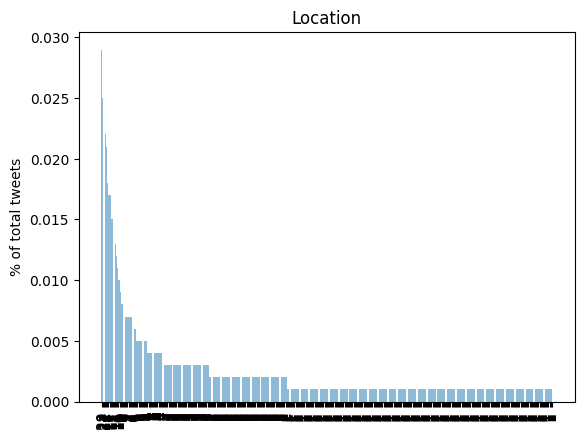

In [ ]:
#plotting
import matplotlib.pyplot as plt
import numpy as np
plt.rcdefaults()
objects = data_formatted4['#Tweets'].tolist()
y_pos = np.arange(len(objects))
performance = data_formatted4['%_of_total#']
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects,rotation='vertical')
plt.ylabel('% of total tweets')
plt.title('Location')
plt.show()

In [ ]:
#Distribution of tweets by candidate
#Distribution of tweets reply by candidate
#Activity by candidate
#Tweets per Hour and DOW

**SENTIMENT ANALYSIS**

In [ ]:
#Import NLTK 
import nltk
from nltk.corpus import stopwords
import random

In [ ]:
#Training sentiment 
training_set = pd.read_csv("trainingandtestdata/training.1600000.processed.noemoticon.csv", 
                 encoding = 'latin-1',
                 names = ["Polarity", "Tweet ID","Date","Query","User","Text"])

In [ ]:
#Filter out stop words in text column
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [ ]:
#Create data that puts tweet texts together with sentiment score
tweets_and_polarity_scores = []
for i in range(0, len(training_set)):
    if training_set["Polarity"].iloc[i] == 0 or training_set["Polarity"].iloc[i] == 4: 
        tweet_text = training_set['Text'].iloc[i]
        tweet_words_in_list = [e.lower() for e in tweet_text.split()]
        tweet_words_in_list_wo_stopwords = [e for e in tweet_words_in_list if not e in stopwords]
        tweet_polarity_score = training_set["Polarity"].iloc[i]
        tweets_and_polarity_scores.append((tweet_words_in_list_wo_stopwords, tweet_polarity_score))
    else: 
        continue

In [ ]:
random_sample = random.sample(tweets_and_polarity_scores, k = 1000)

In [ ]:
def get_words_in_tweets(tweets):
    all_words= []
    for (words, sentiment) in tweets:
        all_words.extend(words)
    return all_words

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = list(wordlist.keys())
    return word_features

word_features = get_word_features(get_words_in_tweets(random_sample))

In [ ]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features["contains(%s)" % word] = (word in document_words)
    return features

In [ ]:
final_training_set = nltk.classify.apply_features(extract_features, random_sample)

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(final_training_set)

In [ ]:
#Testing
tweet_positive = 'I dont like Larry'
classifier.classify(extract_features(tweet_positive.split()))
#classifier.show_most_informative_features(32)

0